In [1]:
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from IPython.display import display, HTML

### Q2.1 Does the herding bias for hearing songs really happen in our society?
#### Description of question
> Herding bias means somebody would listen to several songs sung by specific singers. When we have a postive impression on the first song we hear from this singer, it's possible that we want to listen to other songs from this singer. And usually it's more likely we would love other songs from him/her, no matter whether he/she is famous.

#### Dataset

***train_triplet.txt*** - This dataset contains three features:
* User_ID: ID of users, which is used to specify different singers
* Song_ID: ID of songs, which is used to specify different songs
* Play_Count: number of times this user plays this songs

***track_unique*** - This dataset contains the mapping from song_ID to name of singer
* User_ID: ID of users, which is used to specify different singers
* singer_ID: name of singers

#### Steps
* Load the dataset into dataframe & preprocessing
* Quick observation of the dataset
* Group the frame by user-ID and find several songs with higher playcount for each user
* Map Song_ID to the singers and observe whether there're songs from the same singer
* Define a way to measure the level of herding bias of the user
* Visualize the level of herding bias
* Observation & Comment

#### Load the dataset into dataframe & preprocessing
Here we have made our dataset into pickle to avoid wasting too much loading time & memory.

In [2]:
# # load data from pickle
# click_data = pickle.load(open('train_triplets', 'rb'))
# click_data.columns = ['User_ID', 'Song_ID', 'Play_Count']

# # remove the data with Play_Count = 1
# click_data = click_data[click_data['Play_Count'] != 1]


# load from pickle
click_data_group = pickle.load(open('Q2_1_raw', 'rb'))

In [3]:
# sampling
click_data_group = click_data_group[0:50029]

# number of people in the sample set
print('# of people we observe in our sample:', len(click_data_group.groupby('User_ID').sum()))

# of people we observe in our sample: 1022


#### Quick observation of the dataset
We can find that there's no NaN values in the dataset

In [4]:
# check the number of NaN in dataset
click_data_group.isnull().sum()

Song_ID       0
Play_Count    0
dtype: int64

#### Group the frame by user-ID and find several songs with higher playcount for each user

In [5]:
# # group the data with User_ID
# click_data_group = \
# click_data.groupby('User_ID').apply(lambda t: t.sort_values(by='Play_Count', ascending = False))

# # drop useless features - USER-ID
# click_data_group = click_data_group.drop('User_ID', 1)




#### Map Song_ID to the singers and observe whether there're songs from the same singer

In [6]:
# load the dataset to help us map 'name of singer' to 'Song_ID'
unique_tracks = pickle.load(open('./datasets/pickle_files/df_pickle_msd_unique_tracks', 'rb'))

# make a dictionary for mapping
dict_artist = unique_tracks[['song_id', 'artist_name']]
dict_artist = (dict_artist.set_index('song_id').to_dict())['artist_name']

# mapping & reorder the columns
click_data_group['Artist'] = click_data_group['Song_ID'].map(dict_artist)
click_data_group = click_data_group[['Song_ID', 'Artist', 'Play_Count']]
click_data_group.head(26)

Song_ID  \
User_ID                                                                 
00000b722001882066dff9d2da8a775658053ea0 12098218  SOBQJJX12A6D4F7F01   
                                         12098219  SOBSSGK12A6D4F9EF1   
                                         12098220  SOCTXQW12A6D4F70AD   
                                         12098221  SOCZQCY12AC468E40F   
                                         12098222  SOFLJQZ12A6D4FADA6   
                                         12098223  SOJOJUN12A8AE47E1D   
                                         12098224  SOKBXYC12A6D4F59D6   
                                         12098225  SOMRTLE12A58A78D26   
                                         12098226  SORDKNX12A8C13A45F   
                                         12098227  SOTCWRK12AB017E47D   
                                         12098228  SOTDOKZ12A8C137FCD   
                                         12098229  SOUBEXV12AB01804A4   
00001638d6189236866af9bbf309ae6c2347ffdc 33672925  SOWOTHK12A67AD818B   
                                         33672912  SOAORYL12A67AD8187   
                                         33672920  SONGKIR12A58A779D3   
                                         33672924  SOWMWVC12A67AD9795   
                                         33672918  SOLODPO12AB017F217   
                                         33672916  SOFFWTH12A6310D9E8   
                                         33672922  SOPFRAN12A8C13AA77   
                                         33672913  SOBFEDK12A8C13BB25   
                                         33672914  SOCIJBR12AB017BD92   
                                         33672915  SOEKYTM12A8C13CBF4   
                                         33672917  SOFXSRW12A6D4F3B77   
                                         33672919  SOLOYFG12A8C133391   
                                         33672921  SOOEPEG12A6D4FC7CA   
                                         33672923  SOUWYDL12A8C139BDD   

                                                                      Artist  \
User_ID                                                                        
00000b722001882066dff9d2da8a775658053ea0 12098218             Blue Man Group   
                                         12098219    John Parish / PJ Harvey   
                                         12098220  Nick Cave & The Bad Seeds   
                                         12098221               Ana Carolina   
                                         12098222                    Cartola   
                                         12098223              Edwyn Collins   
                                         12098224               Jim Gaffigan   
                                         12098225               Jim Gaffigan   
                                         12098226                      Giles   
                                         12098227                 Tab Benoit   
                                         12098228                  MC Solaar   
                                         12098229                Miley Cyrus   
00001638d6189236866af9bbf309ae6c2347ffdc 33672925              Richard Swift   
                                         33672912              Richard Swift   
                                         33672920                Sesto Sento   
                                         33672924                Billy Bragg   
                                         33672918            Essential Logic   
                                         33672916             The Beach Boys   
                                         33672922              Amel Larrieux   
                                         33672913                  Neko Case   
                                         33672914               Darude_ JS16   
                                         33672915                 Grand Funk   
                                         33672917                  Kate Bush   
                 

Note: Although we only show 2 users in the result above, we can already see that the 1st user listens to 2 songs from Jim Gaffigan and 2nd user listens to 2 songs from Richard Swift

#### Define a way to measure the level of herding bias of the user
It's hard to say whether this person has herding bias because there's no formal definition to help us make a classification, and therefore, we decide to design a measurement, which can tell us the level of herding bias for this person: <br>
Consider there are $M$ data for the user, $p_m$ is Play_Count of $m$th data, and $s_m$ is the singer of $m$th data 
###  $LevelOfHerdingBias = {\sum{p_mu_m}\over\sum_{m}{p_m}}$ 
where $u_m$ is equal to 1 when $s_m$ exists more than once in $M$ data, and is equal to 0 otherwise (exists only once)<br>
The intuition of this measurment is that we want to calculate the percentage of playcounts from the songs sung by the same singer, and it's counted only if this singer exists for more than once in the user's data. The range of this measurement is from 0 to 1 because we divide the total playcounts, and hence it is safe for us to use this measurement to compare two users with different size of data.

In [7]:
# calculate score of herding bias based on the formula above
herding_bias_score = \
click_data_group.groupby('User_ID').apply(lambda t: t.Play_Count[pd.Series.duplicated(t.Artist, False)].sum()/t.Play_Count.sum())

herding_bias_score_wo_0 = herding_bias_score[herding_bias_score != 0]

#### Visualize the level of herding bias
Here, we use histogram to show the distribution of the score obtained from previous step. We provide 2 plots. The first plot is the histogram with score 0, and the second plot is the histogram without score 0. The purpose of second plot is to help us have a better understanding of distribution of other scores

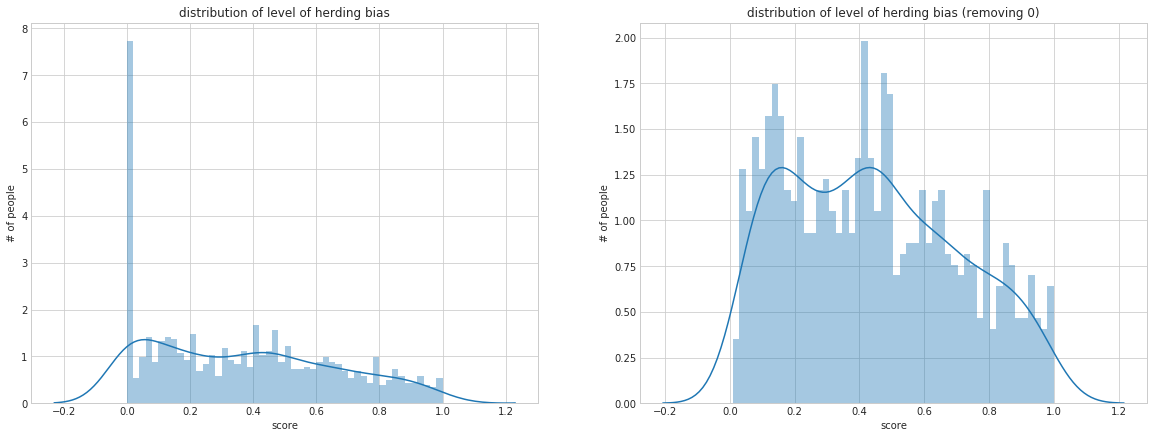

In [8]:
# set the style
sns.set_style('whitegrid')

# plot
fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_size_inches(20,7)
ax1 = sns.distplot(herding_bias_score, ax = ax1, bins=50)
ax1.set_xlabel('score')
ax1.set_ylabel('# of people')
ax1.set_title('distribution of level of herding bias')

ax2 = sns.distplot(herding_bias_score_wo_0, ax = ax2, bins=50)
ax2.set_xlabel('score')
ax2.set_ylabel('# of people')
ax2.set_title('distribution of level of herding bias (removing 0)')
plt.show()

Boxplot to see the properties of distribution

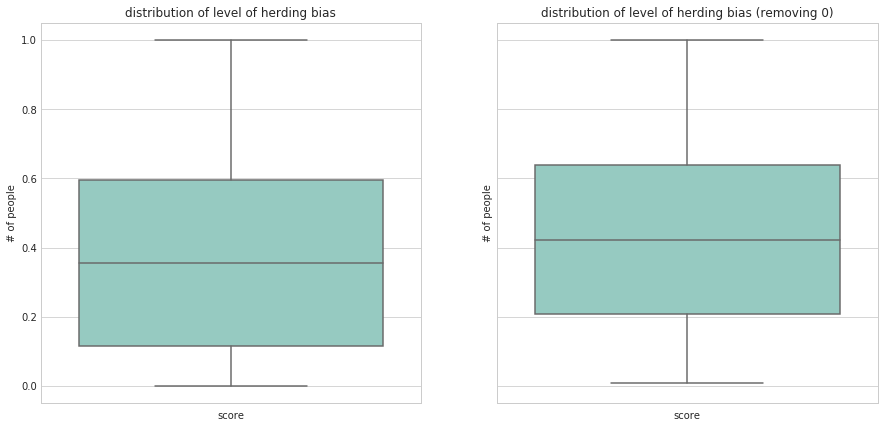

In [9]:
fig, (ax1, ax2) = plt.subplots(1,2, sharey=True)
fig.set_size_inches(15,7)
ax1 = sns.boxplot(y=herding_bias_score, ax = ax1, palette="Set3", showfliers=False)
ax1.set_xlabel('score')
ax1.set_ylabel('# of people')
ax1.set_title('distribution of level of herding bias')

ax2 = sns.boxplot(y=herding_bias_score_wo_0, ax = ax2, palette="Set3", showfliers=False)
ax2.set_xlabel('score')
ax2.set_ylabel('# of people')
ax2.set_title('distribution of level of herding bias (removing 0)')
plt.show()

#### Observation & Comment
From the result above, we could see nearly 160 people out of 1022 people (only 16%) have score 0, and this means that they listen to songs from different singers, and the other 84% people have more or less herding bias. We could see median value is roughly 0.38, which is not a low score in the real world. Imagine there are more than 50% of people clicking at least 38% of songs only from certain singers, this means that our listening list is somehow constrained to certain singers. <br>

#### Investigation into the user with extreme value
However, we are afraid of and also curious about the users with the extreme values (0 and 1) because there may be some problems causing them to get this unrealistic values. Hence, we make an extention of this question to take a look at the user with score 0 and 1

#### Users with score 1
We try to see whether these people with score 1 really focus on only some 
specific and small number of singers

In [10]:
# for users with score 1
click_data_group.drop('Song_ID',1).loc[list(herding_bias_score[herding_bias_score==1].index)]\
.groupby(['User_ID','Artist']).count()

Play_Count
User_ID                                  Artist                             
0004b96b5813088cb59bfe7b06972ee8e72ef277 Asaf Avidan & the Mojos          15
                                         Red Hot Chili Peppers             4
0015f967e25f0719f45386d37f91793041c377a7 Avril Lavigne                     7
                                         Samsas Traum                      8
                                         Static-X                          5
001660e967282963ab15eea27f093c42e13a8fd1 Bethany Dillon                    6
                                         David Crowder*Band                3
                                         Shawn McDonald                    7
00166347442730d3e6c089542fac8daaa4bb5376 Florence + The Machine           14
001d50ed6ec51d2846f3372c006135def4f4bf64 Kevin Johansen                    2
                                         Orishas                          27
0029cb7955dcde8340fd85b6a9f68001cd32eb47 Gibonni                          10
                                         Parni Valjak                      6
00393e2878d1a4b8c8c9ad8ba20eae6f6cd5cf2f CSS                              11

It turns out there's no problem for the users with score 1, the songs they listen to are sung by at most 3 singers, which means that they're really crazy for some specific singers

#### Users with score 0
For users with 0, we want to make sure that the score 0 doesn't result from insufficient number of data because the fewer the data is, the more possible the score is 0. We use histogram to see the distribution of # of data.

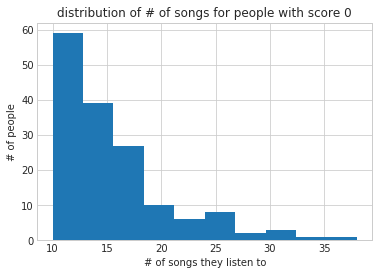

In [11]:
# for users with score 0
click_data_group.drop('Song_ID',1).loc[list(herding_bias_score[herding_bias_score==0].index)]\
.groupby('User_ID').apply(lambda t: len(t)).hist()
plt.ylabel('# of people')
plt.xlabel('# of songs they listen to')
plt.title('distribution of # of songs for people with score 0')
plt.show()

We could see for each user, there're at least 10 data, which is actually an ambiguous number. It's hard to let us conclude whether this score is valid. For me I believe it's valid because I open my spotify and take a look at the songs I listen to recently, and it turns that there're 3 songs from the same singer out of 10 data, so I think it's more possible that these people don't have herding bias

### Q2.2 Do people tend to listen to songs from famous singers?  
#### Description of question
> In other words, we want to see whether the songs sung by famous singers are usually popular.
 
#### Dataset: million song dataset
We use two features in this dataset:
* artist_name: singer name
* artist_hotttnesss: the popularity of singer
* title: song title
* song_hotttnesss: the popularity of the songs, from 0 to 1
* year: song release year

#### Steps
* Load the dataset into dataframe & preprocess
* Choose several popular/unpopular singers and extract their songs
* Compare the song_hotttnesss of songs from popular singers and unpopular singers
* Visualize to show the difference of song_hotttnesss between popular singers and unpopular singers
* Observation & Comment <br> 


#### Load the dataset into dataframe & preprocess
Here we have made our dataset into pickle to avoid wasting too much loading time & memory.

In [12]:
m_song =  pickle.load(open('./datasets/pickle_files/df_pickle_msd_summary', 'rb'))

# only reserve these four features
m_song = m_song[['artist_name', 'artist_hotttnesss', 'title', 'song_hotttnesss', 'year']].dropna()

# remove the song with year = 0
m_song = m_song[m_song.year != 0]

# remove the song without song_hotttnesss or song_hotttnesss = 0
m_song = m_song[~m_song.song_hotttnesss.isnull()]
m_song = m_song[m_song.song_hotttnesss != 0]


#### Observation of dataset before preprocessing
data size: (1000000,5)

| feature           | # of missing values |
|-------------------|---------------------|
| artist_name       | 0                   |
| artist_hotttnesss | 12                  |
| title             | 0                   |
| song_hotttnesss   | 418035              |
| year              | 0                   |

We could see there're 41.8% of song_hotttnesss missing, but for other features, the missing values are really few
#### Observation of dataset after preprocessing
data size: (306298, 5)

| feature           | # of missing values |
|-------------------|---------------------|
| artist_name       | 0                   |
| artist_hotttnesss | 0                   |
| title             | 0                   |
| song_hotttnesss   | 0                   |
| year              | 0                   |

The size of the dataset is greatly reduced becasue of large number of missing values in song_hotttnesss, but we have no choice because song_hotttness is computed by some algorithm we don't know and this feature is the key to the solution to our question.

In [13]:
# the code used to generate the result above
# print('data size:', m_song.shape)
# print('\nNaN values statistics:')
# print(m_song.isnull().sum())


#### Choose several popular/unpopular singers and extract their songs
We only choose several popular/unpopular singers during 2005 - 2010. The way we choose popular/unpopular singers depends on the feature 'artist_hotttnesss', we analyze the popular/unpopular singer with artist_hotttnesss higher than 0.85/lower than 0.15.


In [14]:
# only consider the year >= 2005
m_song_05_10 = m_song[m_song.year >= 2005]

# only consider the singer with artist_hotttnesss >= 0.85
popular_singer = m_song_05_10[m_song_05_10.artist_hotttnesss >= 0.80]
unpopular_singer = m_song_05_10[(m_song_05_10.artist_hotttnesss > 0) & (m_song_05_10.artist_hotttnesss <= 0.20)]

m_song_05_10 = pd.concat([popular_singer, unpopular_singer])

# only consider the songs sung by one singer 
# the artist_name of the song with several singers would be like singerA/singerB/... 
token = ['/', '&', 'feat']
m_song_05_10 = m_song_05_10[[all(word not in name for word in token) for name in m_song_05_10.artist_name]]

# only consider the singer with more than 5 data
tmp = m_song_05_10.groupby('artist_name').apply(lambda t: len(t) > 5)
m_song_05_10 = m_song_05_10[[tmp[name] for name in m_song_05_10.artist_name]]

m_song_05_10.head()

,artist_name,artist_hotttnesss,title,song_hotttnesss,year
1161,Daft Punk,1.021256,Technologic (Vitalic Remix),0.599715,2005
2286,Trey Songz,0.886323,All The Ifs (Album Version),0.527703,2005
7247,Kanye West,1.082503,RoboCop,0.885513,2008
11821,Weezer,0.816313,The Damage In Your Heart,0.756422,2005
12556,T.I.,0.872839,You Ain't Missin' Nothing (Explicit Album Vers...,0.672212,2008


#### Compare the song_hotttnesss of songs from popular singers and unpopular singers
First, we show the unpopular singer name and popular name of the dataset because we need to compare them later.

In [15]:
popular_singer_name = m_song_05_10[m_song_05_10.artist_hotttnesss >= 0.80].artist_name.unique()
unpopular_singer_name = m_song_05_10[m_song_05_10.artist_hotttnesss <= 0.20].artist_name.unique()

print('popular singer:')
print(popular_singer_name)

print('\nunpopular singer:')
print(unpopular_singer_name)

popular singer:
['Daft Punk' 'Trey Songz' 'Kanye West' 'Weezer' 'T.I.' 'Rihanna' 'Eminem'
 'The Killers' 'Flo Rida' 'Black Eyed Peas' 'Katy Perry' 'Coldplay'
 'Plain White T S' 'Maroon 5' 'Lady GaGa' 'Shakira' 'Taylor Swift' 'Ke$ha'
 'Kings Of Leon' 'Usher' 'Jason Aldean' 'Carrie Underwood' 'Alicia Keys'
 "Plain White T's" 'Green Day' 'Akon' 'Bruce Springsteen']

unpopular singer:
['Stemm' 'Lee Ritenour' 'The Slickers' 'Watashi Wa' 'Liléa narrative'
 'Brandon Schott' 'La Excepcion' 'Die Unsichtbaren' 'Faith Yang'
 'Hazmat Modine' 'Ready Fire Aim' 'J-Shin' 'Dark Meat' 'Music For A While'
 'Kira Neris']


Then, we use decribe to observe the distribution of song_hotttnesss for each singer, and we sort the dataframe by the **median of song_hotttness** for each singer. Interestingly, you could see almost all of the popular singers have higher song_hotttnesss (you could see the feature 'popular', if it's true, it means that this singer is popular)

In [16]:
stat = m_song_05_10.groupby('artist_name').song_hotttnesss.describe().sort_values(by='50%', ascending= False)
stat['popular'] = [name in popular_singer_name for name in stat.index]
stat

,count,mean,std,min,25%,50%,75%,max,popular
artist_name,,,,,,,,,
Lady GaGa,9.0,0.846240,0.105475,0.612626,0.819715,0.856773,0.889682,1.000000,True
Ke$ha,9.0,0.833146,0.034500,0.779937,0.813340,0.830201,0.836678,0.890680,True
Black Eyed Peas,17.0,0.766347,0.165203,0.352232,0.656255,0.802500,0.884543,1.000000,True
Coldplay,37.0,0.763354,0.132168,0.454043,0.678076,0.786657,0.852136,1.000000,True
Kanye West,31.0,0.756921,0.126714,0.299877,0.713772,0.785567,0.812470,1.000000,True
Jason Aldean,21.0,0.769871,0.104819,0.639960,0.687815,0.780050,0.869017,0.975770,True
Weezer,8.0,0.780298,0.024563,0.756267,0.758850,0.779554,0.790244,0.829244,True
Carrie Underwood,6.0,0.779087,0.034252,0.741051,0.764588,0.775219,0.778163,0.842841,True
Taylor Swift,20.0,0.815635,0.089189,0.742190,0.749038,0.773852,0.853829,1.000000,True


#### Visualize to show the difference of song_hotttnesss between popular singers and unpopular singers
We use boxplot to plot the distribution of median values of song_hotttness for popular singer and unpopular singer

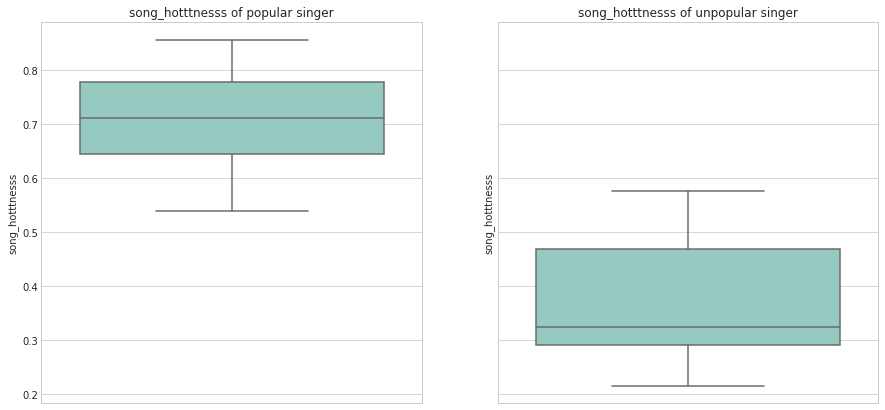

In [17]:
popular_hotttnesss = stat[[name in popular_singer_name for name in stat.index]]['50%']
unpopular_hotttnesss = stat[[name in unpopular_singer_name for name in stat.index]]['50%']

fig, (ax1, ax2) = plt.subplots(1,2, sharey=True)
fig.set_size_inches(15,7)
ax1 = sns.boxplot(y= popular_hotttnesss, ax = ax1, palette="Set3", showfliers=False)
ax1.set_ylabel('song_hotttnesss')
ax1.set_title('song_hotttnesss of popular singer')

ax2 = sns.boxplot(y=unpopular_hotttnesss, ax = ax2, palette="Set3", showfliers=False)
ax2.set_ylabel('song_hotttnesss')
ax2.set_title('song_hotttnesss of unpopular singer')
plt.show()



#### Observation & Comment 
From the result above, we could see there's a huge difference of song_hotttnesss between popular singers and unpopular singers. Therefore, the answer to "whether the hotness of a singer would directly make an influence on the hotness of their songs" is definite yes. The more popular the singer is, the more popular their song is. <br>
This phenomenon is like 'rich get richer'. We could also observe this phenomenon in real world. Just choose a popular singer in these days and check their music videos on YouTube, you would find no matter what these songs are, they usually have high click through rate.

### Q2.3 Whether the first song of the singer matters for his/her career

#### Description of question
> In this problem, we also focus on famous singers. We want to see whether the first song of this singer has some correlation with his/her career. To be more precise, we want to see whether the first song of the famous singer is usually popular, and the first songs opens his/her career. In real world, we could really find this phenomenon, for example, the korean singer psy became famous with the song 'gangnam style'.

#### Dataset: million song dataset
We use two features in this dataset:
* song_hotttnesss: the popularity of the songs
* Singer_ID: name of the singers

#### Steps
* Load the dataset into dataframe & preprocess
* Choose several popular/unpopular singers and extract their songs in the first year
* See the meidan of song_hotttnesss in the 1st year of the singers
* Visualize to show the correlation
* Observation & Comment <br> 

#### Load the dataset into dataframe & preprocess
In this part we also use million song dataset, but this time we are going to compare popular singers and unpopular singers during different periods: 1995-2000, 2000-2005, 2005-2010

#### Choose several popular/unpopular singers and extract their songs in the first year
In this part, we also choose the popular singers with artist_hotttnesss >= 0.80 and unpopular singers with artist_hotttnesss <= 0.20 from different periods: 1995-2000, 2000-2005, 2005-2010, and we concatenate them together

In [18]:
# generate the dataframe
complete_frame = pd.DataFrame()

for year in range(1990,2010,5):
    m_song_subset = m_song[(m_song.year >= year) & (m_song.year <= year + 5)]

    popular_singer = m_song_subset[m_song_subset.artist_hotttnesss >= 0.80]
    unpopular_singer = m_song_subset[(m_song_subset.artist_hotttnesss > 0) & (m_song_subset.artist_hotttnesss <= 0.20)]

    m_song_subset = pd.concat([popular_singer, unpopular_singer])

    # only consider the songs sung by one singer 
    # the artist_name of the song with several singers would be like singerA/singerB/... 
    token = ['/', '&', 'feat']
    m_song_subset = m_song_subset[[all(word not in name for word in token) for name in m_song_subset.artist_name]]

    # only consider the singer with more than 5 data
    tmp = m_song_subset.groupby('artist_name').apply(lambda t: len(t) > 5)
    m_song_subset = m_song_subset[[tmp[name] for name in m_song_subset.artist_name]]

    popular_singer_name = m_song_subset[m_song_subset.artist_hotttnesss >= 0.80].artist_name.unique()
    unpopular_singer_name = m_song_subset[m_song_subset.artist_hotttnesss <= 0.20].artist_name.unique()


    m_song_subset = m_song_subset.groupby('artist_name').apply(lambda t: t[t.year == min(t.year)].median())
    m_song_subset['year'] = str(year) + ' - ' + str(year + 5)

    m_song_subset['popular'] = [name in popular_singer_name for name in m_song_subset.index]
    complete_frame = pd.concat([complete_frame, m_song_subset])

#### See the meidan of song_hotttnesss in the 1st year of the singers
we could see the hotness of unpopular singers' songs in first year  are usually lower than that of popular singers, which means that our guess may be right. Next, let us see the visualization

In [19]:
complete_frame.head()

,artist_hotttnesss,song_hotttnesss,year,popular
artist_name,,,,
Bruce Springsteen,0.838096,0.539222,1990 - 1995,True
Green Day,0.812308,0.737665,1990 - 1995,True
Lee Ritenour,0.144685,0.265025,1990 - 1995,False
Raging Slab,0.102711,0.400443,1990 - 1995,False
Shakira,0.804220,0.701124,1990 - 1995,True


#### Visualize to show the correlation
In this part, we use scatter plot to see whether there're obvious difference between popular singers and unpopular singers

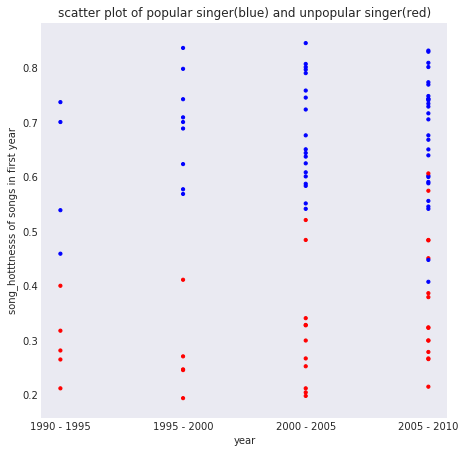

In [20]:
sns.set_style('dark')
fig = plt.figure(figsize=(16,16))
ax  = fig.add_subplot(2,2,1)

colors = {True: 'blue', False: 'red'}
ax.scatter(complete_frame['year'], complete_frame['song_hotttnesss'], \
           s=10, c=complete_frame['popular'].apply(lambda x: colors[x]))
ax.set_ylabel('song_hotttnesss of songs in first year')
ax.set_xlabel('year')
ax.set_title('scatter plot of popular singer(blue) and unpopular singer(red)')
plt.show()

#### Observation & Comment
We could see that in most cases, if the singer's songs in his/her first year are popular, then it's highly likely that he/she would be popular afterwards! And from 2010 to 2015, there're some exceptions, i.e. unpopular singers' songs are popular firstly or popular singers' songs are unpopular firstly 

### Conclusion for Q2
From Q2, we address some phenomenon about users' behavior and what may make a singer become popular, and the following is the suggestions to users and singers based on the results we got above
> For user: based on Q2.1 and Q2.2, we would suggest users to try more different songs from unpopular singers. Because of herding bias, people would tend to listen to songs from certain singers, and in Q2.2, we know songs from popular singers are usually popular. Hence, it's possible that people usually only listen to songs from popular singers

> For singer: If you want to be popular, please seize this opportunity in your first year! In Q2.3 we have already seen that most of popular singers have a success on their first album, and with the result from Q2.2: 'people tend to listen to popular singers', you should put more time on your first album because that would make your career more likely to succeed!